# Life Expectancy and GDP Analysis

## Project Scoping

### Goals

This project is going to help me understand the relation between humans life expectancy and the GDP of their country. The goals for this project are as follow:
- Is there a correlation on life expectancy and GDP?
- If yes, how and in which matter?
- What can I do for my personal situation?

### Actions

The main actions would be, how to extend one's own life expectancy given on their situation.

### Data

For this project, I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank for six countries.

### Analysis

I will do different steps for the whole analysis:
- Data Wrangling and Tidying
- Data Manipulation with Pandas
- Data Visualization
- Hypothesis Testing
- Summarizing Quantitative Data

## EDA

In [1]:
# Let's start and import libraries and load the data from the csv file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [2]:
# Inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [3]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [4]:
print(df['Country'].value_counts())

Zimbabwe                    16
Chile                       16
China                       16
Germany                     16
United States of America    16
Mexico                      16
Name: Country, dtype: int64


In [5]:
# So the data looks complete and has logical values in it
# I just gonna rename the "Life expectancy..." column
df = df.rename(columns={"Life expectancy at birth (years)": "Life"})
print(df.head())

  Country  Year  Life           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


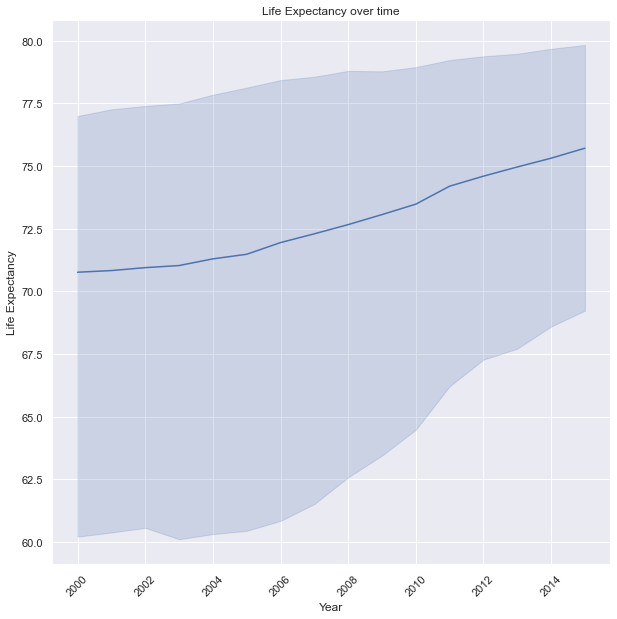

<Figure size 432x288 with 0 Axes>

In [6]:
# We start with a bar plot to visualize the life expectancy change over time
fig = plt.figure(figsize=(10,10))
ax = sns.lineplot(data=df, x="Year", y="Life")
plt.title("Life Expectancy over time")
ax.set_ylabel("Life Expectancy")
plt.xticks(rotation=45)
plt.savefig("life_exp_over_time.png")
plt.show()
plt.clf()

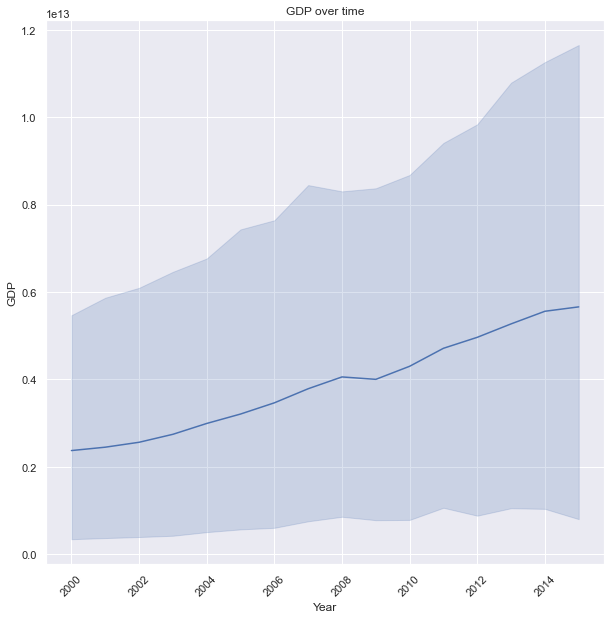

<Figure size 432x288 with 0 Axes>

In [7]:
# Now, we visualize the GDP change over time
fig = plt.figure(figsize=(10,10))
ax = sns.lineplot(data=df, x="Year", y="GDP")
plt.title("GDP over time")
plt.xticks(rotation=45)
plt.savefig("gdp_over_time.png")
plt.show()
plt.clf()

In [8]:
# Now, we are gonna visualize the change over time by country
mexico = df[df['Country'] == 'Mexico']
chile = df[df['Country'] == 'Chile']
germany = df[df['Country'] == 'Germany']
china = df[df['Country'] == 'China']
zimbabwe = df[df['Country'] == 'Zimbabwe']
usa = df[df['Country'] == 'United States of America']

print(mexico.head())

   Country  Year  Life           GDP
48  Mexico  2000  74.8  6.836480e+11
49  Mexico  2001  75.0  7.247040e+11
50  Mexico  2002  75.0  7.415600e+11
51  Mexico  2003  75.0  7.132840e+11
52  Mexico  2004  75.4  7.702680e+11


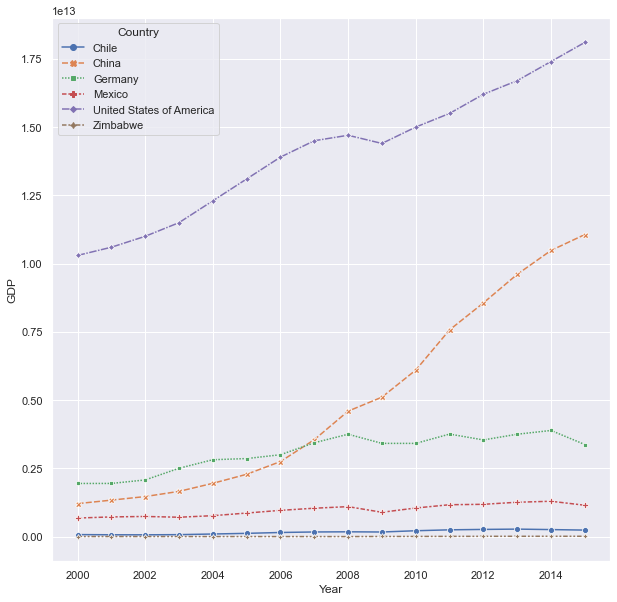

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x="Year", y="GDP", hue="Country", style="Country", markers=True)
plt.show()
plt.clf()
# Overall we see a positive change in GDP in all countries. Thus, USA and China had the biggest positive chagne.
# Germany had little growth, but stagnated in the latest years.
# The other countries (Mexico, Chile & Zimbabwe) stayed more or less same, but we need to examine this separately.

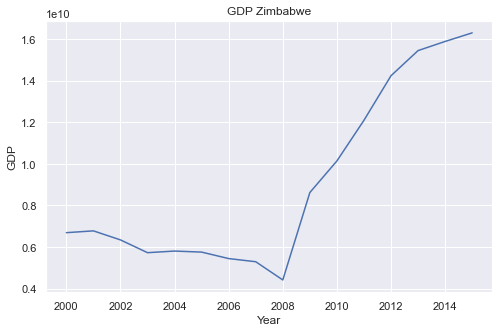

<Figure size 432x288 with 0 Axes>

In [10]:
# Zimbabwe Change over time
plt.figure(figsize=(8,5))
sns.lineplot(data=zimbabwe, x="Year", y="GDP")
plt.title("GDP Zimbabwe")
plt.savefig("gdp_zimbabwe.png")
plt.show()
plt.clf()

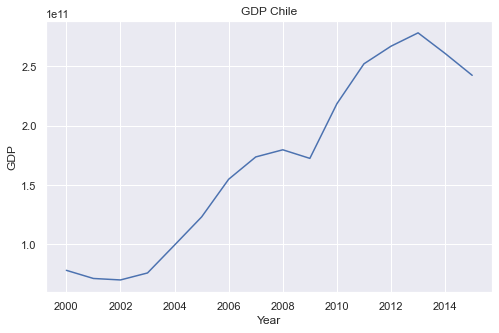

<Figure size 432x288 with 0 Axes>

In [11]:
# Chile Change over time
plt.figure(figsize=(8,5))
sns.lineplot(data=chile, x="Year", y="GDP")
plt.title("GDP Chile")
plt.savefig("gdp_chile.png")
plt.show()
plt.clf()

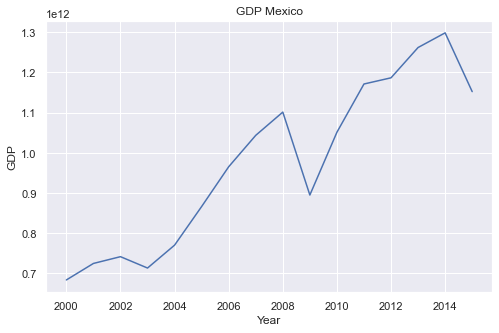

<Figure size 432x288 with 0 Axes>

In [12]:
# Mexico Change over time
plt.figure(figsize=(8,5))
sns.lineplot(data=mexico, x="Year", y="GDP")
plt.title("GDP Mexico")
plt.savefig("gdp_mexico.png")
plt.show()
plt.clf()

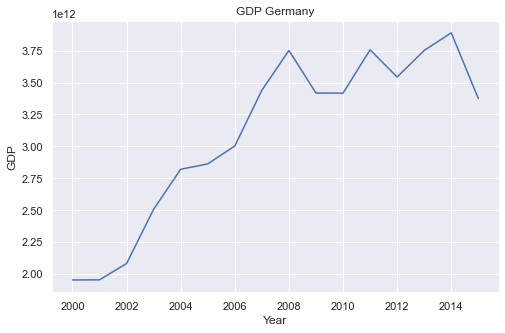

<Figure size 432x288 with 0 Axes>

In [13]:
# Germany Change over time
plt.figure(figsize=(8,5))
sns.lineplot(data=germany, x="Year", y="GDP")
plt.title("GDP Germany")
plt.savefig("gdp_germany.png")
plt.show()
plt.clf()

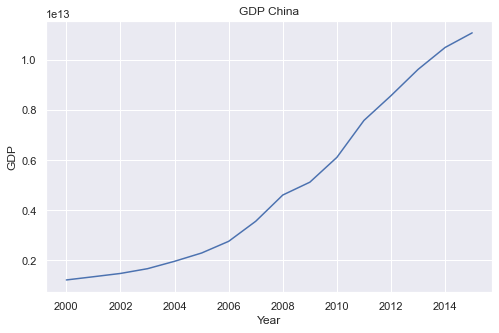

<Figure size 432x288 with 0 Axes>

In [14]:
# China Change over time
plt.figure(figsize=(8,5))
sns.lineplot(data=china, x="Year", y="GDP")
plt.title("GDP China")
plt.savefig("gdp_china.png")
plt.show()
plt.clf()

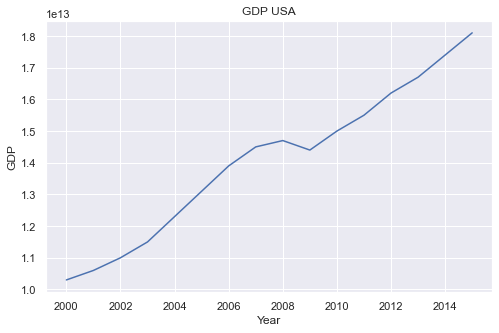

<Figure size 432x288 with 0 Axes>

In [15]:
# USA Change over time
plt.figure(figsize=(8,5))
sns.lineplot(data=usa, x="Year", y="GDP")
plt.title("GDP USA")
plt.savefig("gdp_usa.png")
plt.show()
plt.clf()

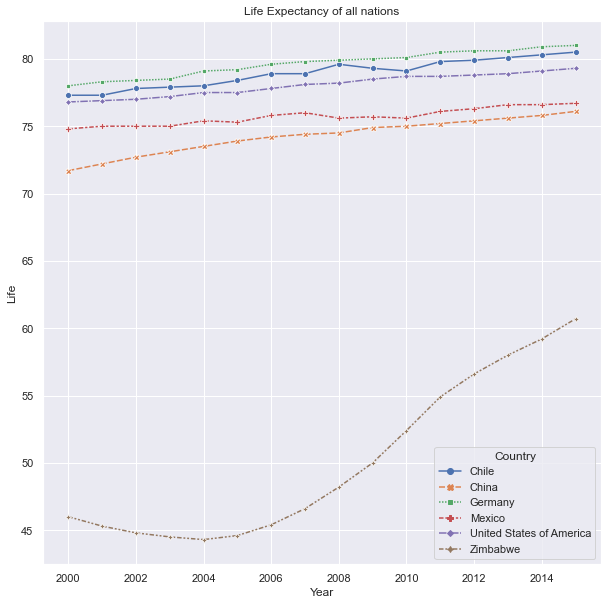

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=df, x="Year", y="Life", hue="Country", style="Country", markers=True)
plt.title("Life Expectancy of all nations")
plt.savefig("life_exp_of_all_nations.png")
plt.show()
plt.clf()
# As we see, life expectancy has increased in all six countries over time. 
# Zimbabwe had the greatest change from 46 to 61 years in 15 years. 

In [17]:
# Average Life Expectancy in all nations:
# Mexico
print("Chile: " + str(round(np.mean(chile['Life']), 2)))
print("China: " + str(round(np.mean(china['Life']), 2)))
print("Germany: " + str(round(np.mean(germany['Life']), 2)))
print("Mexico: " + str(round(np.mean(mexico['Life']), 2)))
print("United States of America: " + str(round(np.mean(usa['Life']), 2)))
print("Zimbabwe: " + str(round(np.mean(zimbabwe['Life']), 2)))

Chile: 78.94
China: 74.26
Germany: 79.66
Mexico: 75.72
United States of America: 78.06
Zimbabwe: 50.09


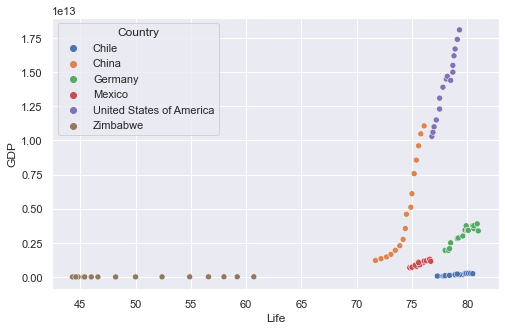

<Figure size 432x288 with 0 Axes>

In [18]:
# See if there's a correlation between life expectancy and gdp
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Life", y="GDP", hue="Country")
plt.savefig("scatterplot.png")
plt.show()
plt.clf()

In [19]:
# Correlation overall
correlation = df.corr()
print(correlation)

          Year      Life       GDP
Year  1.000000  0.155050  0.208288
Life  0.155050  1.000000  0.343207
GDP   0.208288  0.343207  1.000000


In [20]:
chile_life_gdp = chile[['Life', 'GDP']]
chile_corr = chile_life_gdp.corr()
print(chile_corr)

          Life       GDP
Life  1.000000  0.949877
GDP   0.949877  1.000000


In [21]:
china_life_gdp = china[['Life', 'GDP']]
china_corr = china_life_gdp.corr()
print(china_corr)

          Life       GDP
Life  1.000000  0.908526
GDP   0.908526  1.000000


In [22]:
germany_life_gdp = germany[['Life', 'GDP']]
germany_corr = germany_life_gdp.corr()
print(germany_corr)

          Life       GDP
Life  1.000000  0.932699
GDP   0.932699  1.000000


In [23]:
mexico_life_gdp = mexico[['Life', 'GDP']]
mexico_corr = mexico_life_gdp.corr()
print(mexico_corr)

          Life       GDP
Life  1.000000  0.932238
GDP   0.932238  1.000000


In [24]:
usa_life_gdp = usa[['Life', 'GDP']]
usa_corr = usa_life_gdp.corr()
print(usa_corr)

          Life       GDP
Life  1.000000  0.981709
GDP   0.981709  1.000000


In [25]:
zimbabwe_life_gdp = zimbabwe[['Life', 'GDP']]
zimbabwe_corr = zimbabwe_life_gdp.corr()
print(zimbabwe_corr)

        Life     GDP
Life  1.0000  0.9662
GDP   0.9662  1.0000


It looks like there is a high correlation between a country's GDP and their life expectancy. We have an overall correlation of 34%. But if we dive deeper and look into every country's correlation, we see an average of 95%. The lowest correlation from China with 90% and the highest from USA with 98%.